<a href="https://colab.research.google.com/github/subha9542/AI_project/blob/master/AI_project_supervised_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    'https://github.com/subha9542/AI_project/raw/master/ckplus.zip' \
    -O /tmp/ckplus.zip

!wget --no-check-certificate \
    'https://github.com/subha9542/AI_project/raw/master/test_ckplus.zip' \
    -O /tmp/test.zip

--2020-05-08 05:30:44--  https://github.com/subha9542/AI_project/raw/master/ckplus.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/subha9542/AI_project/master/ckplus.zip [following]
--2020-05-08 05:30:45--  https://raw.githubusercontent.com/subha9542/AI_project/master/ckplus.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808550 (3.6M) [application/zip]
Saving to: ‘/tmp/ckplus.zip’

/tmp/ckplus.zip     100%[===================>]   3.63M  11.1MB/s    in 0.3s    

2020-05-08 05:30:45 (11.1 MB/s) - ‘/tmp/ckplus.zip’ saved [3808550/3808550]

--2020-05-08 05:30:48--  https://github.com/subha9542/

In [0]:
import os
import zipfile

local_zip = '/tmp/ckplus.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/train/')
zip_ref.close()
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test/')
zip_ref.close()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])

	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)

	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)

	# return the flattened histogram as the feature vector
	return hist.flatten()

# grab the list of images that we'll be describing
print("[INFO] describing images...")
train_expressions = ['/tmp/train/CK+48/anger','/tmp/train/CK+48/contempt','/tmp/train/CK+48/disgust','/tmp/train/CK+48/happy','/tmp/train/CK+48/fear','/tmp/train/CK+48/sadness','/tmp/train/CK+48/suprise']
train_rawImages = []
train_features = []
train_labels = []
for i in train_expressions:
    imagePaths = list(paths.list_images(i))
    # initialize the raw pixel intensities matrix, the features matrix,
    # and labels list

    # loop over the input images
    for imagePath in imagePaths:
      #print(imagePath)
      image = cv2.imread(imagePath)
      label = i.split("/")[-1]
      # extract raw pixel intensity "features", followed by a color
      # histogram to characterize the color distribution of the pixels
      # in the image
      pixels = image_to_feature_vector(image)
      hist = extract_color_histogram(image)

      # update the raw images, features, and labels matricies,
      # respectively
      train_rawImages.append(pixels)
      train_features.append(hist)
      train_labels.append(label)

train_rawImages = np.array(train_rawImages)
train_features = np.array(train_features)
train_labels = np.array(train_labels)
print("[INFO] pixels matrix: {:.2f}MB".format(
	train_rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
	train_features.nbytes / (1024 * 1000.0)))


[INFO] describing images...
[INFO] pixels matrix: 2.20MB
[INFO] features matrix: 1.46MB


In [0]:
test_expressions = ['/tmp/test/anger','/tmp/test/contempt','/tmp/test/disgust','/tmp/test/happy','/tmp/test/fear','/tmp/test/sadness','/tmp/test/suprise']
test_rawImages = []
test_features = []
test_labels = []
for i in test_expressions:
    imagePaths = list(paths.list_images(i))
    # initialize the raw pixel intensities matrix, the features matrix,
    # and labels list

    # loop over the input images
    for imagePath in imagePaths:
      #print(imagePath)
      image = cv2.imread(imagePath)
      label = i.split("/")[-1]
      # extract raw pixel intensity "features", followed by a color
      # histogram to characterize the color distribution of the pixels
      # in the image
      pixels = image_to_feature_vector(image)
      hist = extract_color_histogram(image)

      # update the raw images, features, and labels matricies,
      # respectively
      test_rawImages.append(pixels)
      test_features.append(hist)
      test_labels.append(label)

test_rawImages = np.array(test_rawImages)
test_features = np.array(test_features)
test_labels = np.array(test_labels)
print("[INFO] pixels matrix: {:.2f}MB".format(
	test_rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
	test_features.nbytes / (1024 * 1000.0)))


[INFO] pixels matrix: 0.12MB
[INFO] features matrix: 0.08MB


In [0]:

# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
#(trainRI, testRI, trainRL, testRL) = train_test_split(
#	rawImages, labels, test_size=0.25, random_state=42)
(trainRI, testRI, trainRL, testRL) = train_test_split(
	train_rawImages, train_labels, test_size=0.25, random_state=42)

# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(trainRI, trainRL)
acc = model.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))


[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 93.99%


In [0]:

k_range = range(1, 10)

# We can create Python dictionary using [] or dict()
scores = []

#testing knn for k in the range 1 to 10
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(trainRI, trainRL)
    #score = knn.score(testRI, testRL)
    knn.fit(train_rawImages, train_labels)
    score = knn.score(test_rawImages, test_labels)
    #score = cross_val_score(knn, testRI, testRL, cv=10, scoring='accuracy')
    scores.append(score.mean())

print(scores)

[1.0, 1.0, 1.0, 0.9743589743589743, 0.9743589743589743, 0.6153846153846154, 0.717948717948718, 0.6153846153846154, 0.6153846153846154]


Text(0, 0.5, 'Testing Accuracy')

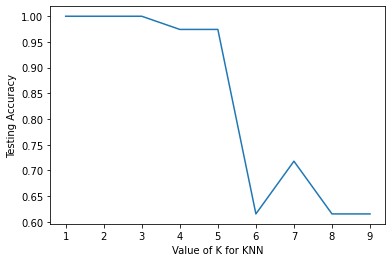

In [0]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')